In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import yfinance as yf
import tensorflow as tf

In [2]:
class StockAnalysis:

    def __init__(self, ticker, start_date, end_date):
        # 주식 데이터 다운로드
        self.df = yf.download(ticker, start=start_date, end=end_date)
        self.df.dropna(inplace=True)
    
    # 데이터 시각화
    def visualize_data(self):
        fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(24, 20))
        
        # 주식 가격 시계열 그래프
        self.df.Close.plot(ax=ax1)
        ax1.set(title=f'{ticker} 시계열', ylabel="주식 가격")
        
        # 거래량 그래프
        self.df.Volume.plot(ax=ax2)
        ax2.set(ylabel="거래량")

        # Close 값 scatter plot
        xval = np.arange(self.df.shape[0])
        ax3.scatter(xval, self.df.Close.values)
        plt.show()
    
    # TensorFlow를 사용한 선형 회귀 학습
    def tf_linear_regression(self, x_data, y_data):
        learning_rate = 0.001
        W = tf.Variable(2.9)
        b = tf.Variable(0.5)

        # 학습과정 저장 리스트
        x_axis_loop = []
        y_axis_cost = []
        
        for i in range(20000):
            with tf.GradientTape() as tape:
                hypothesis = W * x_data + b
                cost = tf.reduce_mean(tf.square(hypothesis - y_data))
            W_grad, b_grad = tape.gradient(cost, [W, b])
            W.assign_sub(learning_rate * W_grad)
            b.assign_sub(learning_rate * b_grad)    
            
            if i > 500:
                x_axis_loop.append(i)
                y_axis_cost.append(cost)        
            
            if i % 1000 == 0:
                print("{:.5f} | {:10.4f} | cost = {:10.6f}".format(i, W.numpy(), b.numpy(), cost))
                
        plt.plot(x_axis_loop, y_axis_cost, 'r-', label='cost')
        plt.legend()
        plt.xlabel('반복')
        plt.show()

        plt.plot(x_data, y_data, 'o')
        plt.plot(x_data, hypothesis, 'r--')
        plt.show()

    # 볼린저 밴드 계산 및 신호 생성
    def compute_bollinger_bands(self, N=10, K=1.5):
        self.df['SMA'] = self.df['Close'].rolling(window=N).mean()
        self.df['STD'] = self.df['Close'].rolling(window=N).std()
        self.df['Upper'] = self.df['SMA'] + (self.df['STD'] * K)
        self.df['Lower'] = self.df['SMA'] - (self.df['STD'] * K)

        # 매수/매도 신호 생성
        self.df['Signal'] = 0
        self.df.loc[self.df['Close'] > self.df['Upper'], 'Signal'] = -1
        self.df.loc[self.df['Close'] < self.df['Lower'], 'Signal'] = 1
        
        plt.figure(figsize=(12,6))
        self.df[['Close', 'SMA', 'Upper', 'Lower']].plot(ax=plt.gca())
        plt.title(f"{ticker} Moving Average and Bollinger Bands")
        plt.show()
        
    # scikit-learn을 사용한 선형 회귀 예측
    def sk_linear_regression(self):
        X = self.df[['SMA', 'Upper', 'Lower']].dropna()
        y = self.df['Signal'][X.index]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        mse = mean_squared_error(y_test, predictions)
        print(f"Mean Squared Error: {mse}")

In [3]:
ticker = "AAPL"
analysis = StockAnalysis(ticker, "2020-01-01", "2022-01-01")

[*********************100%%**********************]  1 of 1 completed


C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.ca

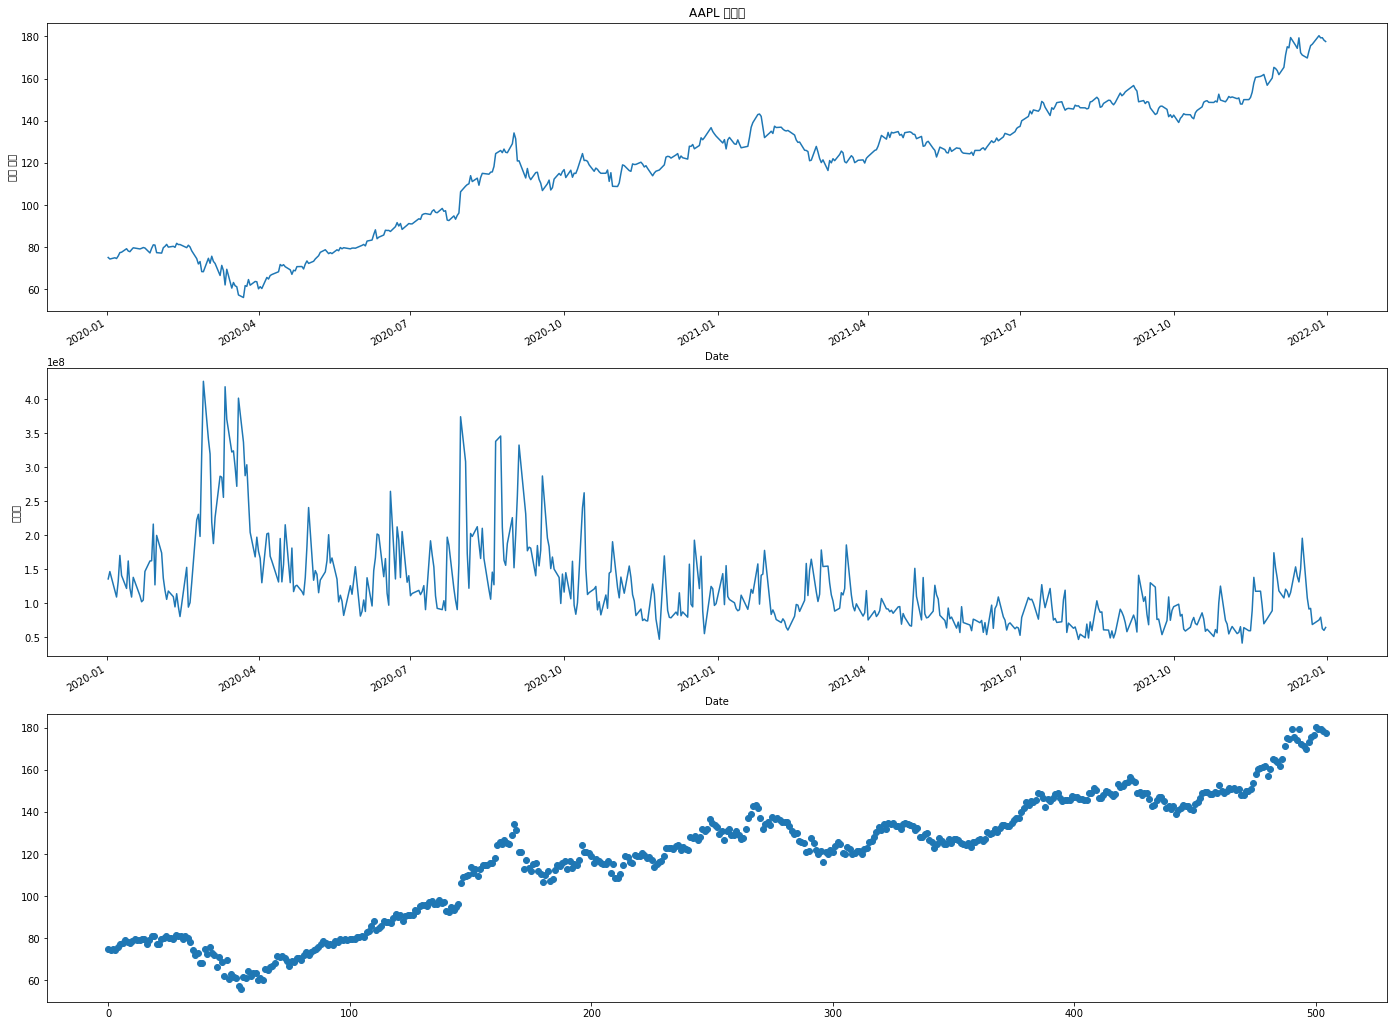

In [4]:
analysis.visualize_data()

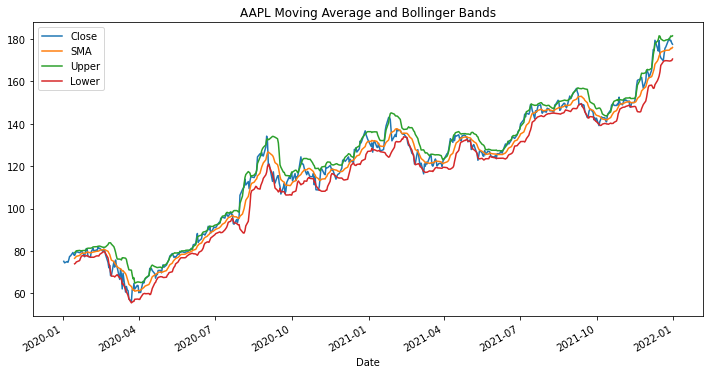

In [5]:
analysis.compute_bollinger_bands()

0.00000 |     2.8058 | cost =   0.481745
1000.00000 |     0.1844 | cost =   0.634097
2000.00000 |     0.1092 | cost =   1.003835
3000.00000 |     0.0669 | cost =   1.211531
4000.00000 |     0.0432 | cost =   1.328202
5000.00000 |     0.0299 | cost =   1.393741
6000.00000 |     0.0224 | cost =   1.430557
7000.00000 |     0.0182 | cost =   1.451238
8000.00000 |     0.0158 | cost =   1.462855
9000.00000 |     0.0145 | cost =   1.469381
10000.00000 |     0.0138 | cost =   1.473046
11000.00000 |     0.0133 | cost =   1.475104
12000.00000 |     0.0131 | cost =   1.476259
13000.00000 |     0.0130 | cost =   1.476906
14000.00000 |     0.0129 | cost =   1.477270
15000.00000 |     0.0129 | cost =   1.477471
16000.00000 |     0.0128 | cost =   1.477590
17000.00000 |     0.0128 | cost =   1.477646
18000.00000 |     0.0128 | cost =   1.477646
19000.00000 |     0.0128 | cost =   1.477646


C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


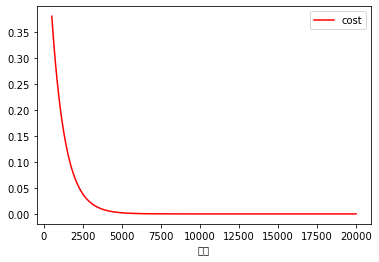

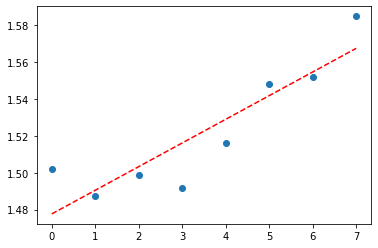

Mean Squared Error: 0.31655945748917114


In [6]:
x_data = np.arange(8)
y_data = analysis.df.Close.values[:8] / 50.0
analysis.tf_linear_regression(x_data, y_data)

# scikit-learn을 사용한 선형 회귀 예측
analysis.sk_linear_regression()